In [1]:
import os
import time
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# from torchdiffeq.torchdiffeq import odeint

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from torchdiffeq import odeint

In [2]:
batch_time = 10
batch_size = 20
data_size = 200

viz = True

In [3]:
def get_batch():
    s = torch.from_numpy(np.random.choice(np.arange(data_size - batch_time, dtype=np.int64), batch_size, replace=False))
    batch_y0 = true_y[s]  # (M, D)
    batch_t = t[:batch_time]  # (T)
    batch_y = torch.stack([true_y[s + i] for i in range(batch_time)], dim=0)  # (T, M, D)
    return batch_y0.to(device), batch_t.to(device), batch_y.to(device)


def makedirs(dirname):
    if not os.path.exists(dirname):
        os.makedirs(dirname)

In [4]:
DATA_TYPE = 'NNET_MORE'

In [15]:
if viz:
    makedirs(DATA_TYPE)
    import matplotlib.pyplot as plt

def visualize(true_y, pred_y, odefunc, itr):
  
    if viz:
      
        plt.figure(figsifacecolor='white')
        plt.xlabel('t')
        plt.ylabel('x, y')
        plt.grid()
        plt.plot(t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 0], t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 1], 'g-')
        plt.plot(t.cpu().numpy(), pred_y.cpu().numpy()[:, 0, 0], '--', t.cpu().numpy(), pred_y.cpu().numpy()[:, 0, 1], 'b--')
        plt.savefig(DATA_TYPE + '/ts' + str(itr) + '.png')
        plt.show()
        
        plt.figure(facecolor='white')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.plot(true_y.cpu().numpy()[:, 0, 0], true_y.cpu().numpy()[:, 0, 1], 'g-')
        plt.plot(pred_y.cpu().numpy()[:, 0, 0], pred_y.cpu().numpy()[:, 0, 1], 'b--')
        plt.savefig(DATA_TYPE + '/phase' + str(itr) + '.png')
        plt.show()

SyntaxError: invalid syntax (1068265162.py, line 9)

In [6]:
class RunningAverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self, momentum=0.99):
        self.momentum = momentum
        self.reset()

    def reset(self):
        self.val = None
        self.avg = 0

    def update(self, val):
        if self.val is None:
            self.avg = val
        else:
            self.avg = self.avg * self.momentum + val * (1 - self.momentum)
        self.val = val

In [7]:
def plot_(x, y):
    plt.plot(x, y)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [ ]:
# class ODEFunc(nn.Module):

#     def __init__(self):
#         super(ODEFunc, self).__init__()

#         self.net = nn.Sequential(
#             nn.Linear(2, 50),
#             nn.Tanh(),
#             nn.Linear(50, 2),
#         )

#         for m in self.net.modules():
#             if isinstance(m, nn.Linear):
#                 nn.init.normal_(m.weight, mean=0, std=0.1)
#                 nn.init.constant_(m.bias, val=0)

#     def forward(self, t, y):
#         return self.net(y)

In [11]:
# true_y0 = torch.tensor([[1., 1.]])
# t = torch.linspace(-15., 15., data_size)


# class Lambda3(nn.Module):
  
#     def __init__(self):
#         super(Lambda3, self).__init__()
#         self.fc1 = nn.Linear(2, 25, bias = False)
#         self.fc2 = nn.Linear(25, 50, bias = False)
#         self.fc3 = nn.Linear(50, 10, bias = False)
#         self.fc4 = nn.Linear(10, 2, bias = False)
#         self.relu = nn.ELU(inplace=True)
        
#     def forward(self, t, y):
#         x = self.relu(self.fc1(y * t))
#         x = self.relu(self.fc2(x))
#         x = self.relu(self.fc3(x))
#         x = self.relu(self.fc4(x))
#         return x
     
# with torch.no_grad():
#     true_y = odeint(Lambda3(), true_y0, t, method='dopri5')

In [8]:
true_y0 = torch.tensor([[1., 1.]]).to(device)
t = torch.linspace(-5., 5., data_size).to(device)

class Lambda_e(nn.Module):
    
    def forward(self, t, y):
        return 1/2 * y
    
with torch.no_grad():
    true_y = odeint(Lambda_e(), true_y0, t, method='dopri5').to(device)

In [48]:
# plot_(true_y.numpy()[:, 0, 0], true_y.numpy()[:, 0, 1])

# plt.figure()
# plt.plot(t.numpy(), true_y.numpy()[:, 0, 0], t.numpy(), true_y.numpy()[:, 0, 1], 'g-')
# plt.show()device

In [9]:
class ODEFunc(nn.Module):

    def __init__(self):
        super(ODEFunc, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(2, 150),
            nn.Tanh(),
            nn.Linear(150, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 2),
        )

        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=0.1)
                nn.init.constant_(m.bias, val=0)

    def forward(self, t, y):
        return self.net(y)


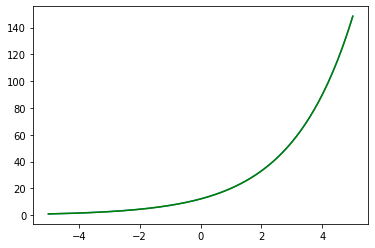

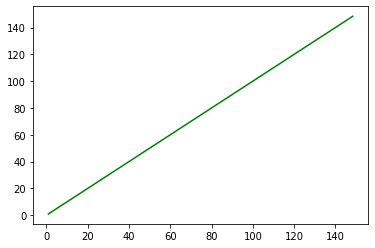

In [10]:
plt.figure()
plt.plot(t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 0], t.cpu().numpy(), true_y.cpu().numpy()[:, 0, 1], 'g-')
plt.show()

plt.figure()
plt.plot(true_y.cpu().numpy()[:, 0, 0], true_y.cpu().numpy()[:, 0, 1], 'g-')
plt.show()

Iter 0050 | Total Loss 23.026989


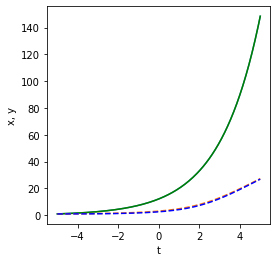

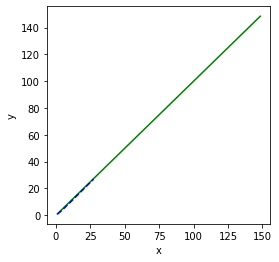

Iter 0100 | Total Loss 18.038572


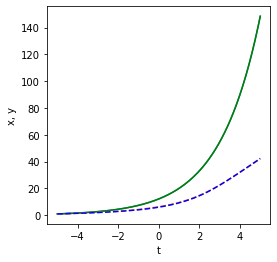

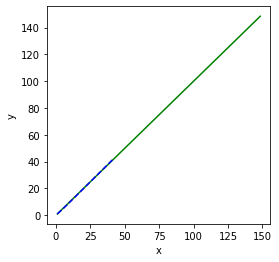

Iter 0150 | Total Loss 29.603285


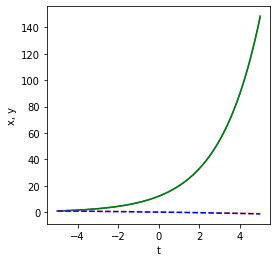

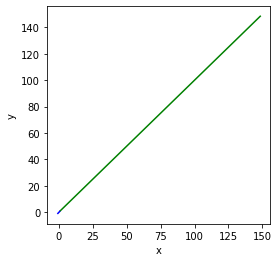

Iter 0200 | Total Loss 8.451180


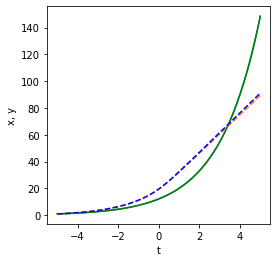

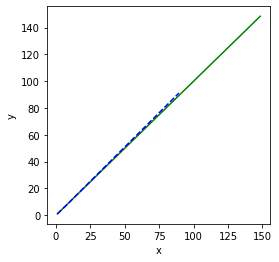

Iter 0250 | Total Loss 8.128165


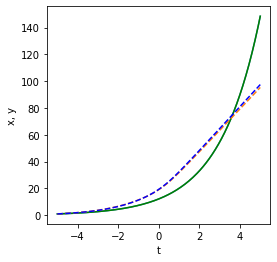

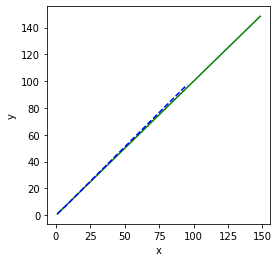

Iter 0300 | Total Loss 29.304388


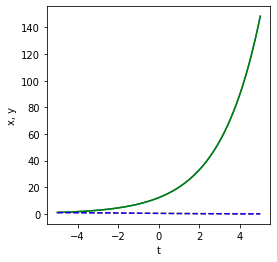

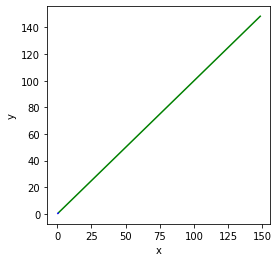

Iter 0350 | Total Loss 7.176251


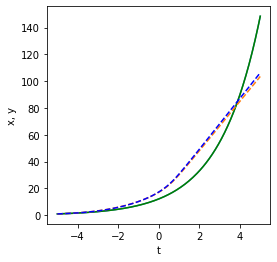

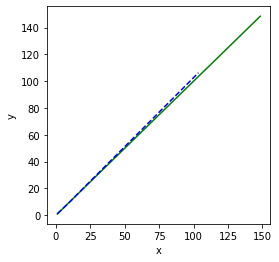

Iter 0400 | Total Loss 4.772151


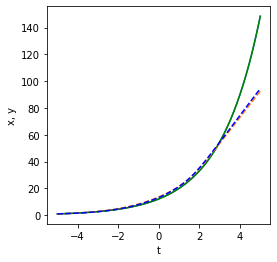

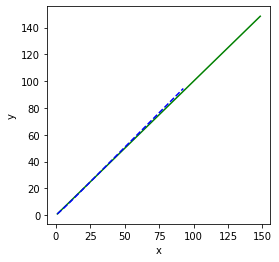

Iter 0450 | Total Loss 29.561092


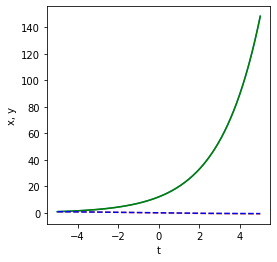

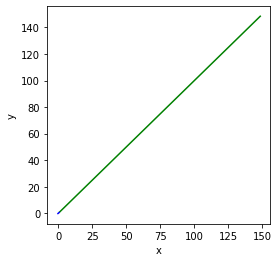

Iter 0500 | Total Loss 9.005700


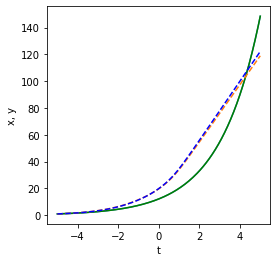

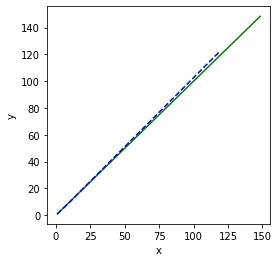

Iter 0550 | Total Loss 16.224045


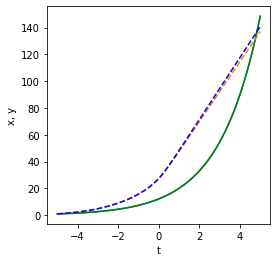

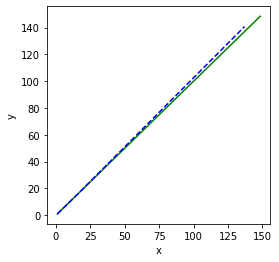

Iter 0600 | Total Loss 11.996122


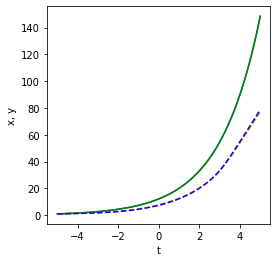

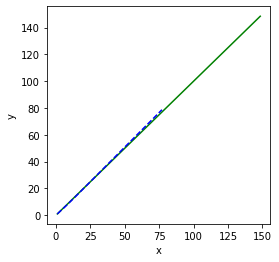

Iter 0650 | Total Loss 18.426212


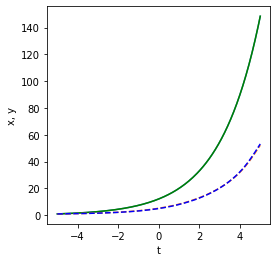

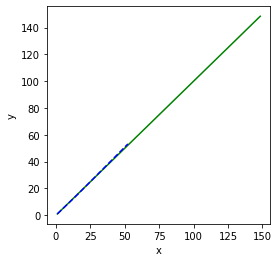

Iter 0700 | Total Loss 13.600154


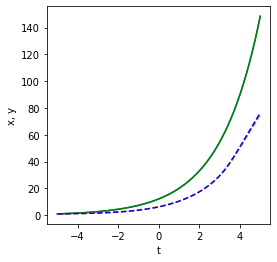

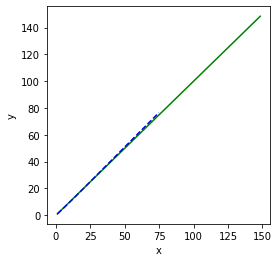

Iter 0750 | Total Loss 6.603165


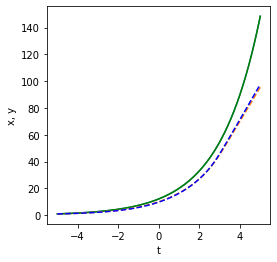

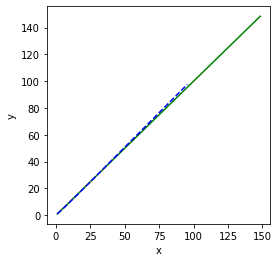

Iter 0800 | Total Loss 21.334759


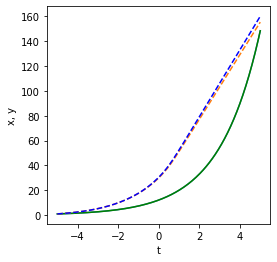

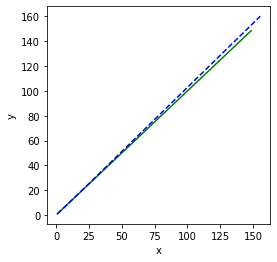

Iter 0850 | Total Loss 20.050095


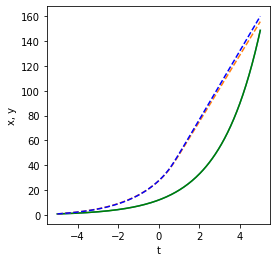

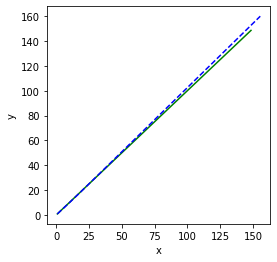

Iter 0900 | Total Loss 8.933050


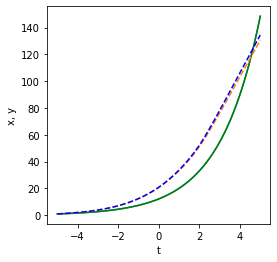

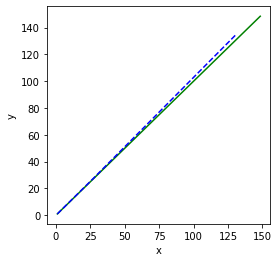

Iter 0950 | Total Loss 9.339458


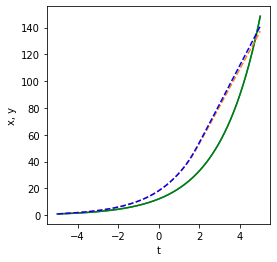

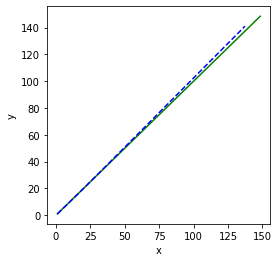

Iter 1000 | Total Loss 5.683309


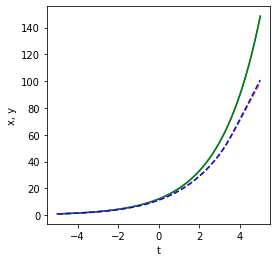

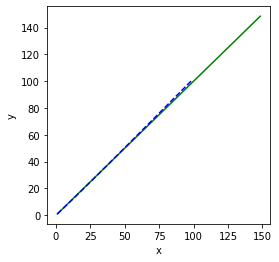

Iter 1050 | Total Loss 12.305583


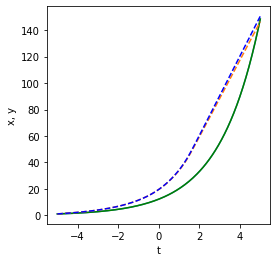

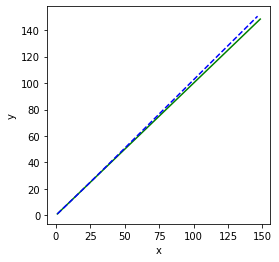

Iter 1100 | Total Loss 5.847657


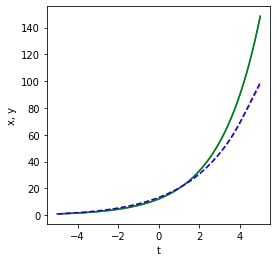

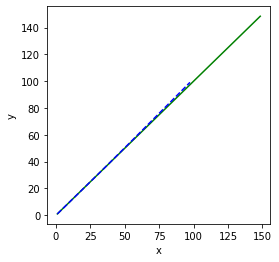

Iter 1150 | Total Loss 29.717733


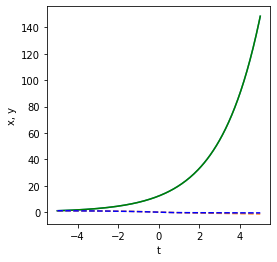

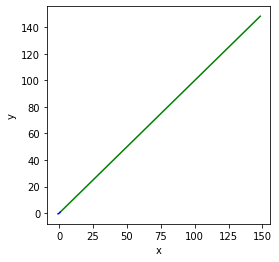

Iter 1200 | Total Loss 23.385595


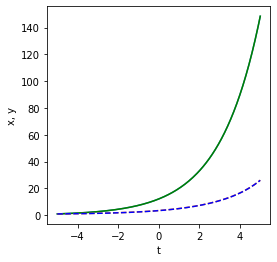

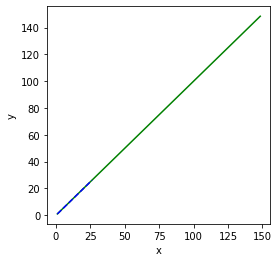

Iter 1250 | Total Loss 17.253004


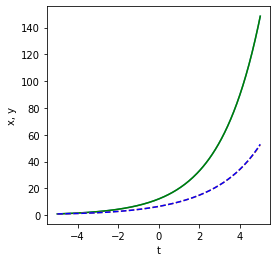

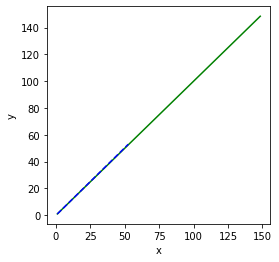

Iter 1300 | Total Loss 12.644204


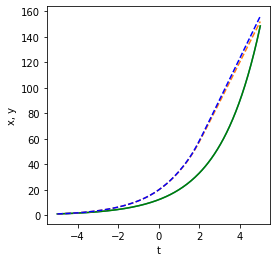

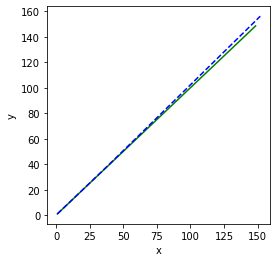

Iter 1350 | Total Loss 15.327407


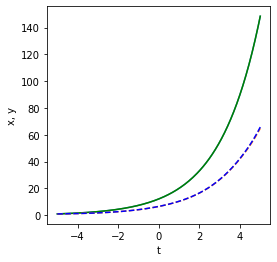

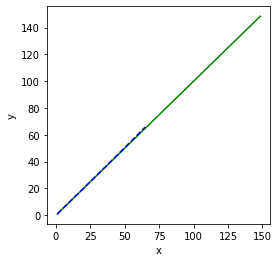

Iter 1400 | Total Loss 9.643500


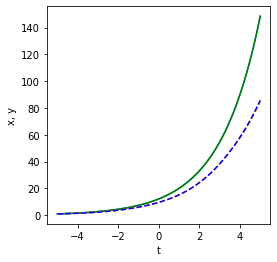

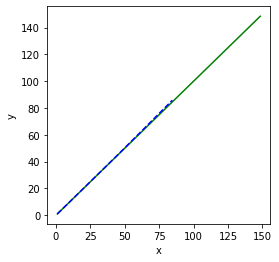

Iter 1450 | Total Loss 16.216101


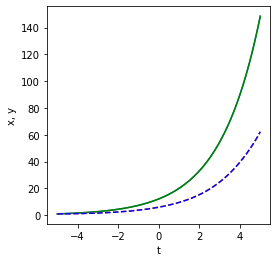

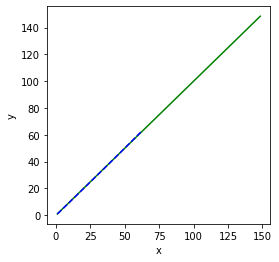

Iter 1500 | Total Loss 15.009730


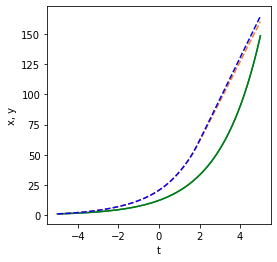

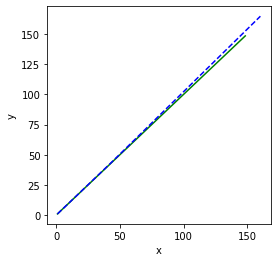

Iter 1550 | Total Loss 14.501841


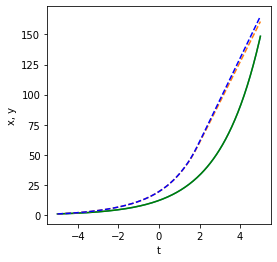

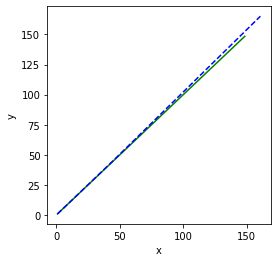

Iter 1600 | Total Loss 9.513227


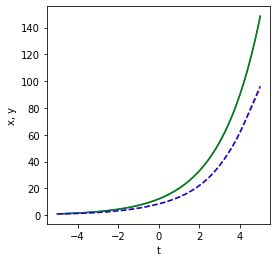

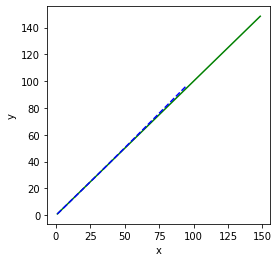

Iter 1650 | Total Loss 12.580571


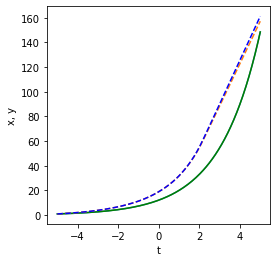

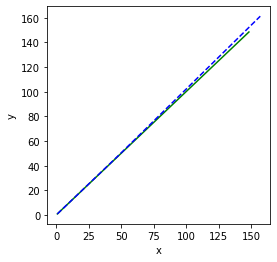

Iter 1700 | Total Loss 16.418194


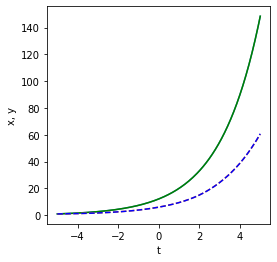

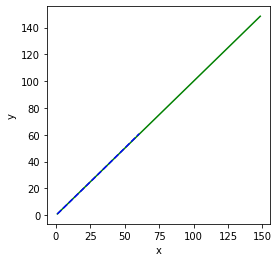

Iter 1750 | Total Loss 4.711261


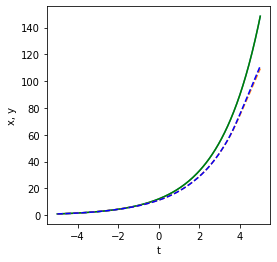

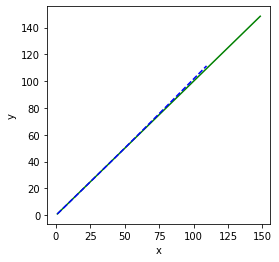

Iter 1800 | Total Loss 4.113384


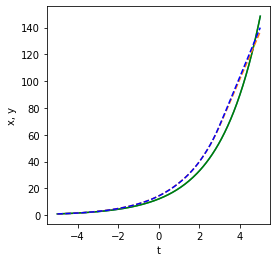

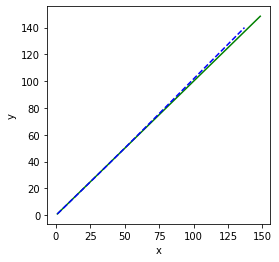

Iter 1850 | Total Loss 3.170224


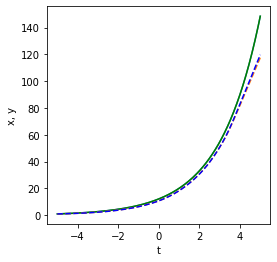

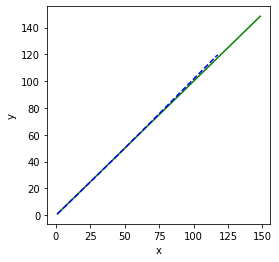

Iter 1900 | Total Loss 5.471693


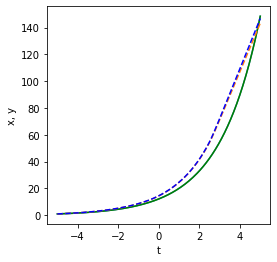

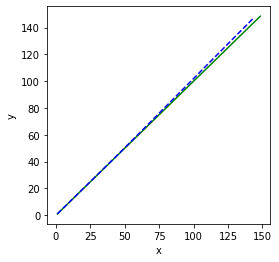

Iter 1950 | Total Loss 1.310671


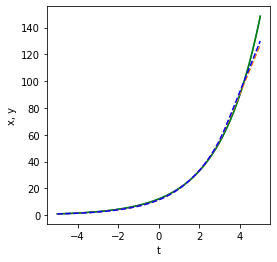

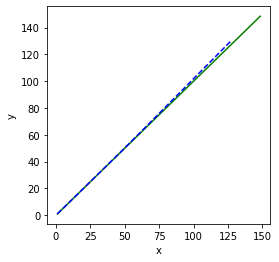

Iter 2000 | Total Loss 9.726325


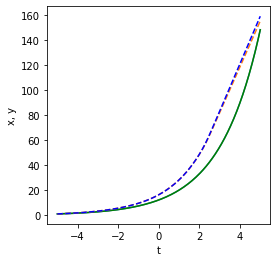

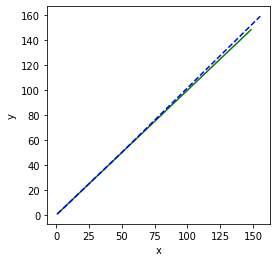

Iter 2050 | Total Loss 10.127125


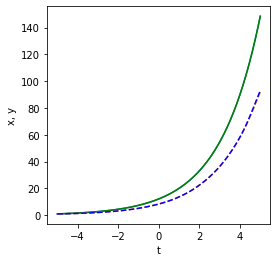

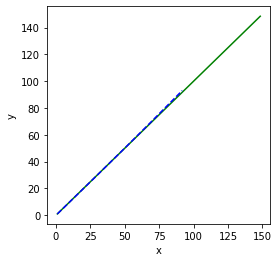

Iter 2100 | Total Loss 2.520234


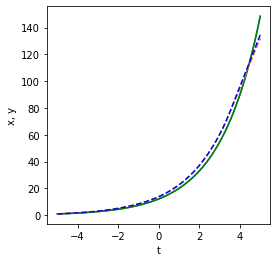

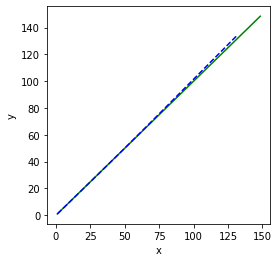

Iter 2150 | Total Loss 14.771247


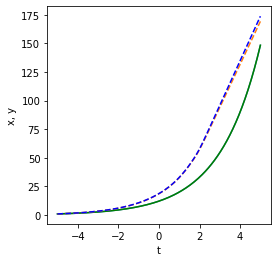

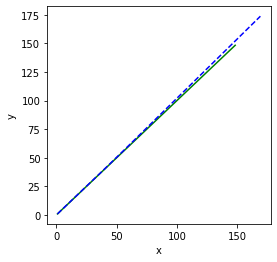

Iter 2200 | Total Loss 7.812744


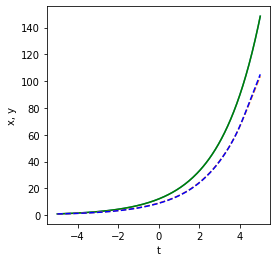

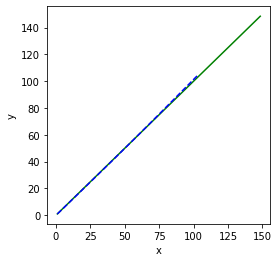

Iter 2250 | Total Loss 10.235178


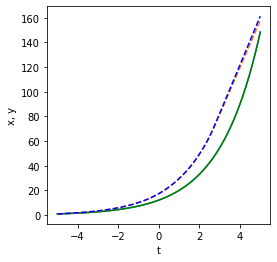

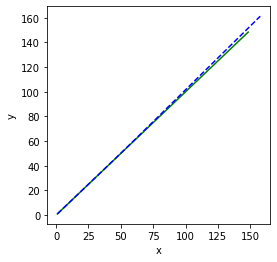

Iter 2300 | Total Loss 1.982126


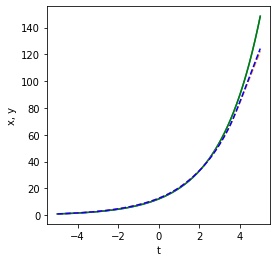

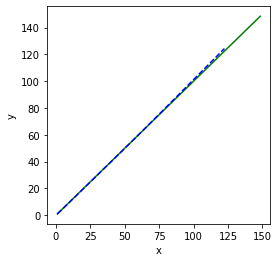

Iter 2350 | Total Loss 5.852421


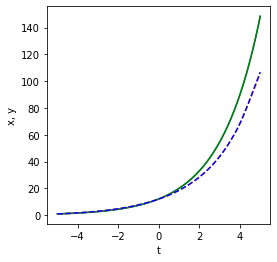

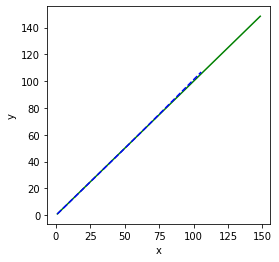

Iter 2400 | Total Loss 3.579822


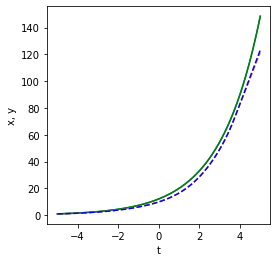

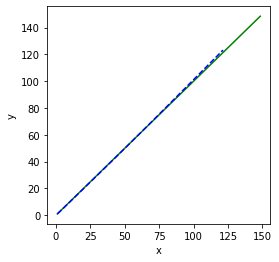

Iter 2450 | Total Loss 10.224723


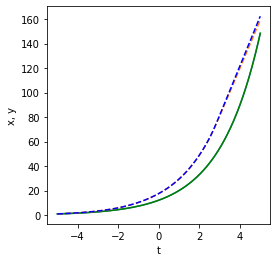

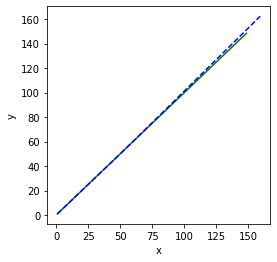

Iter 2500 | Total Loss 5.220427


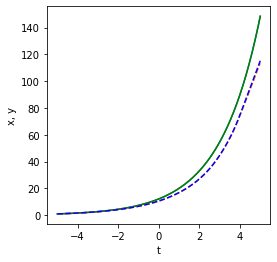

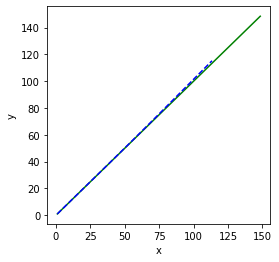

Iter 2550 | Total Loss 7.967900


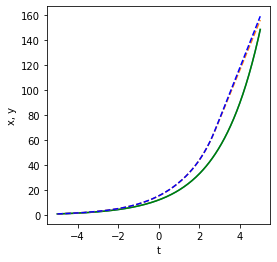

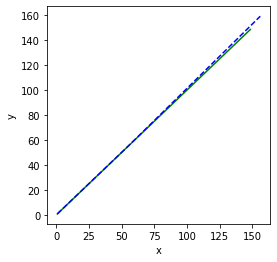

Iter 2600 | Total Loss 7.247750


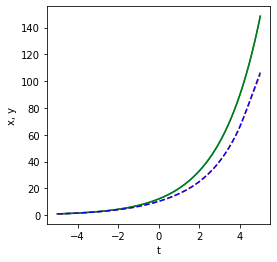

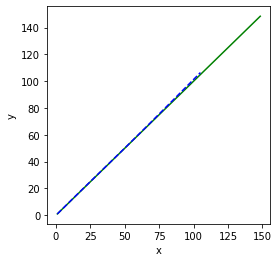

Iter 2650 | Total Loss 10.990558


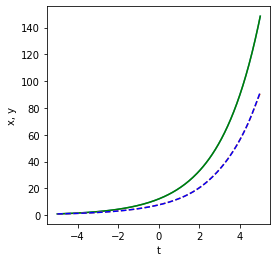

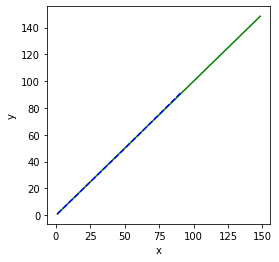

Iter 2700 | Total Loss 11.600259


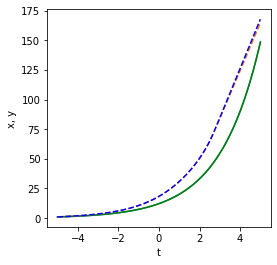

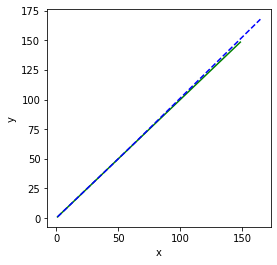

Iter 2750 | Total Loss 11.809187


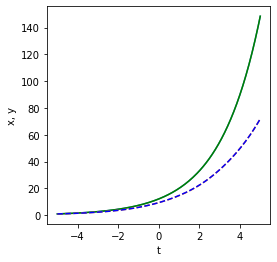

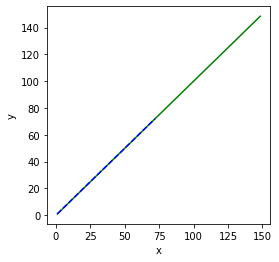

Iter 2800 | Total Loss 10.287403


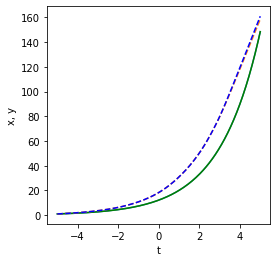

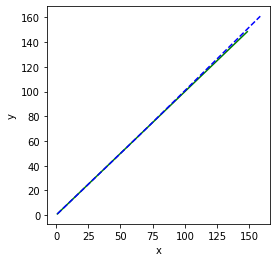

Iter 2850 | Total Loss 13.246382


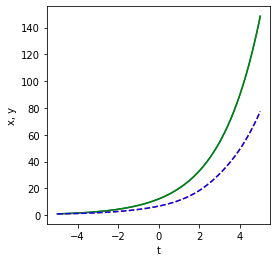

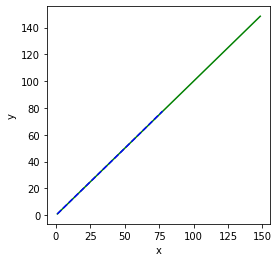

Iter 2900 | Total Loss 4.116086


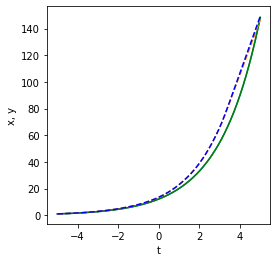

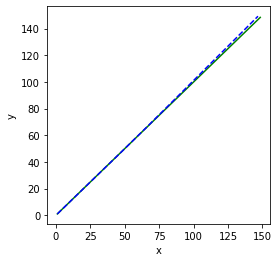

Iter 2950 | Total Loss 10.986208


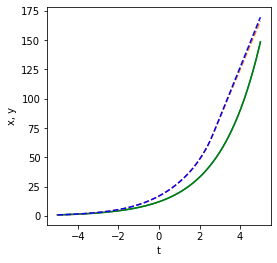

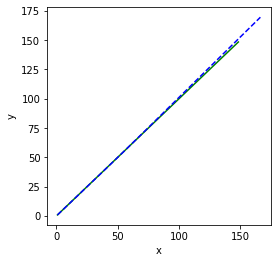

Iter 3000 | Total Loss 4.296799


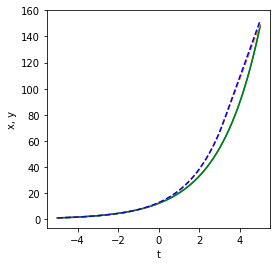

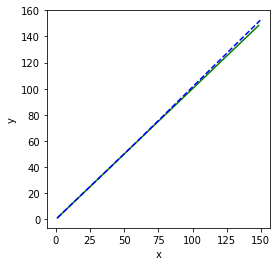

Iter 3050 | Total Loss 12.005299


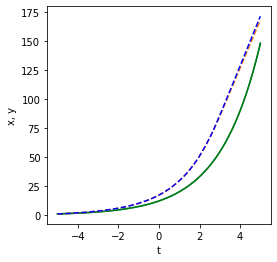

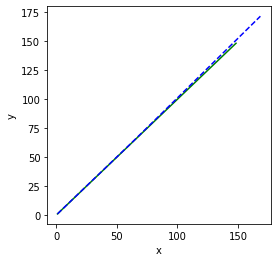

Iter 3100 | Total Loss 7.998185


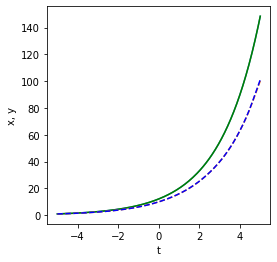

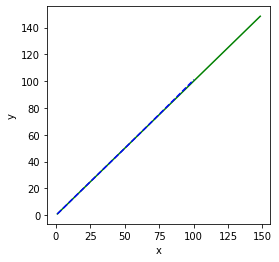

Iter 3150 | Total Loss 10.917389


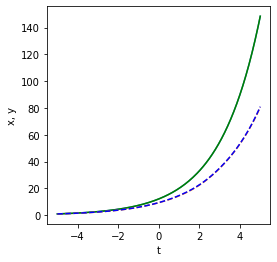

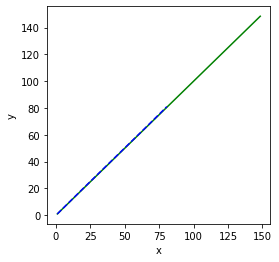

Iter 3200 | Total Loss 4.971078


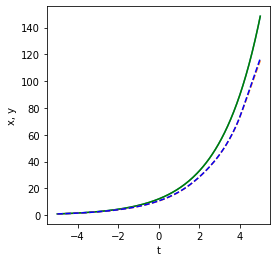

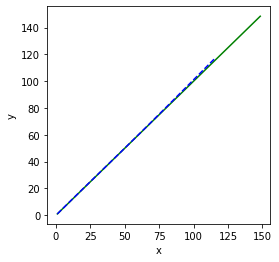

Iter 3250 | Total Loss 9.067856


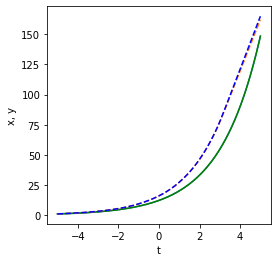

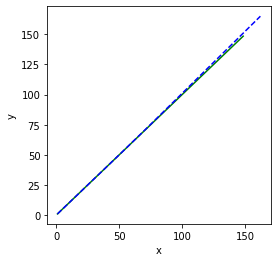

Iter 3300 | Total Loss 3.693926


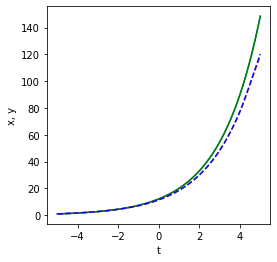

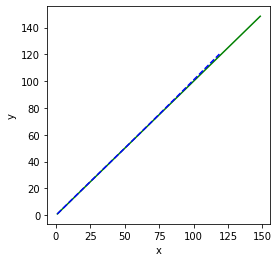

Iter 3350 | Total Loss 7.691935


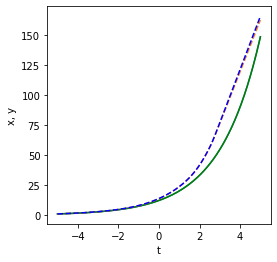

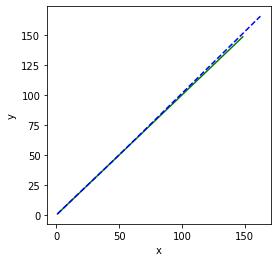

Iter 3400 | Total Loss 5.054572


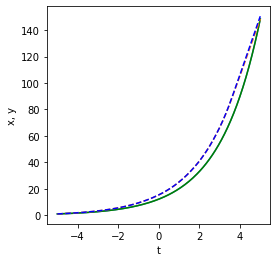

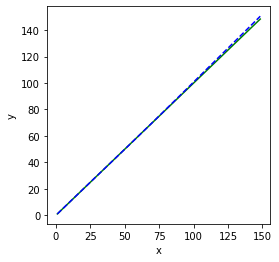

Iter 3450 | Total Loss 7.665584


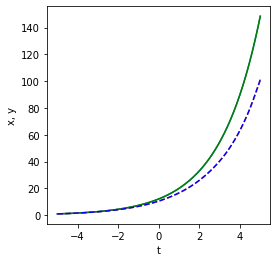

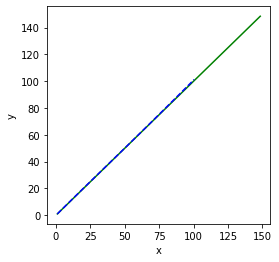

Iter 3500 | Total Loss 9.636200


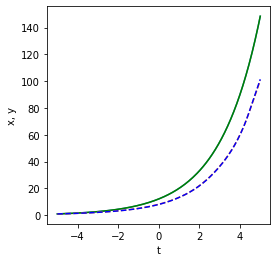

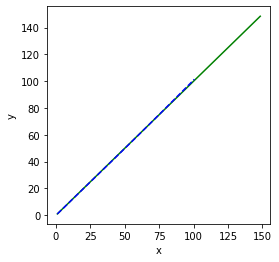

Iter 3550 | Total Loss 3.313873


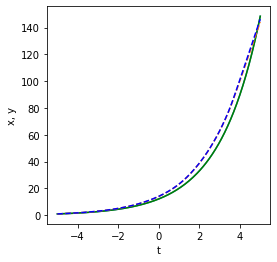

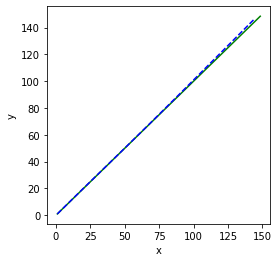

Iter 3600 | Total Loss 10.632864


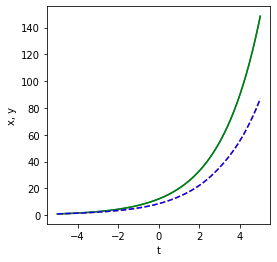

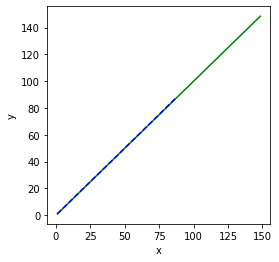

Iter 3650 | Total Loss 7.626213


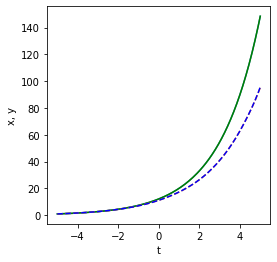

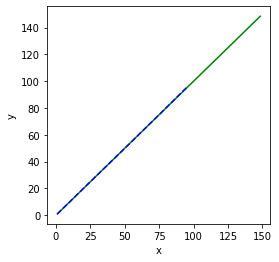

Iter 3700 | Total Loss 12.314582


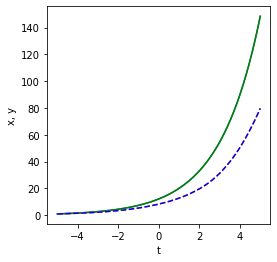

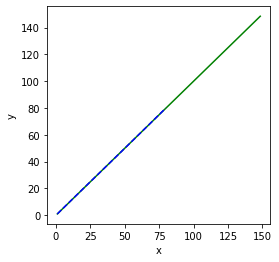

Iter 3750 | Total Loss 8.158210


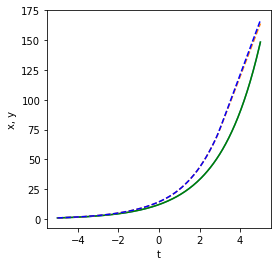

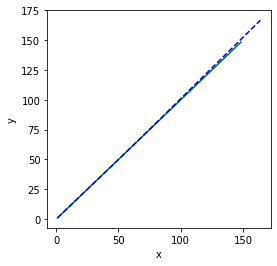

Iter 3800 | Total Loss 5.705672


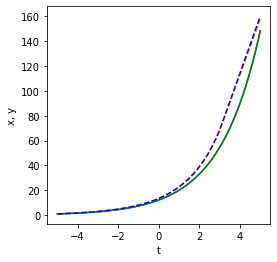

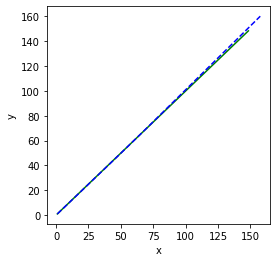

Iter 3850 | Total Loss 6.392286


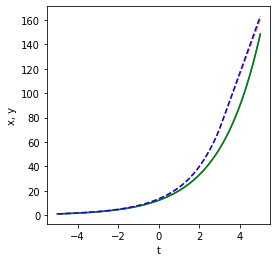

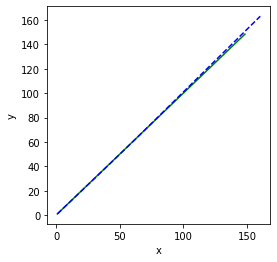

Iter 3900 | Total Loss 9.277518


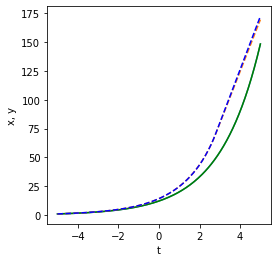

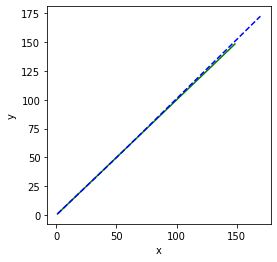

Iter 3950 | Total Loss 7.932657


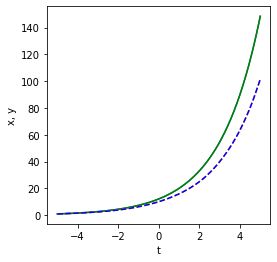

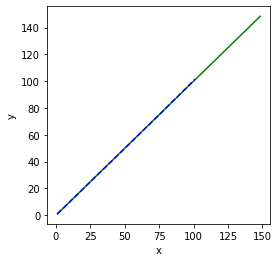

Iter 4000 | Total Loss 1.870067


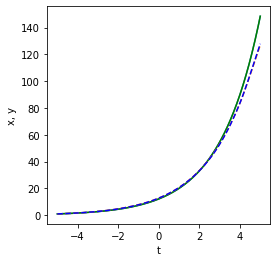

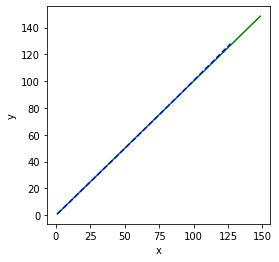

Iter 4050 | Total Loss 8.612793


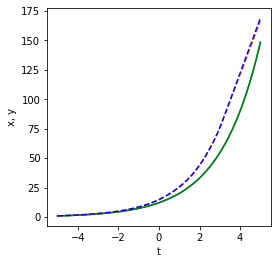

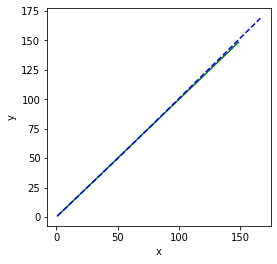

Iter 4100 | Total Loss 3.494051


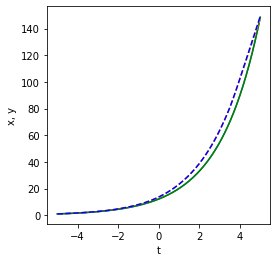

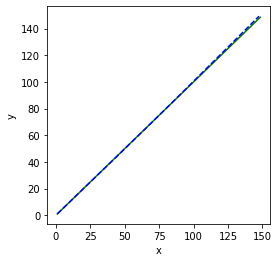

Iter 4150 | Total Loss 8.868379


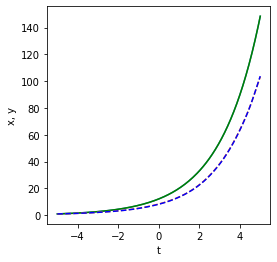

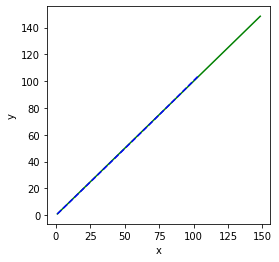

Iter 4200 | Total Loss 5.231677


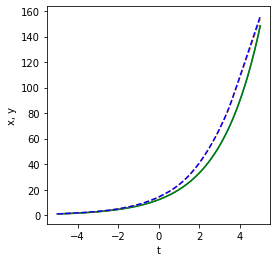

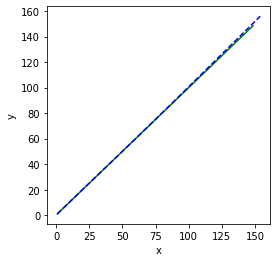

Iter 4250 | Total Loss 3.827679


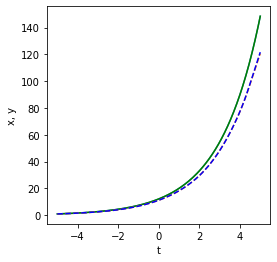

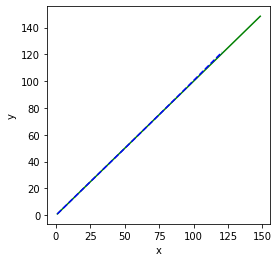

Iter 4300 | Total Loss 10.218425


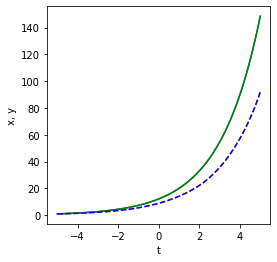

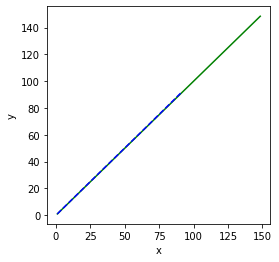

Iter 4350 | Total Loss 2.198206


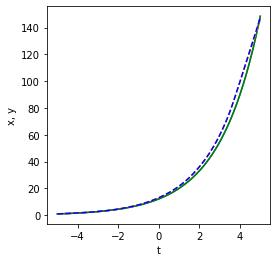

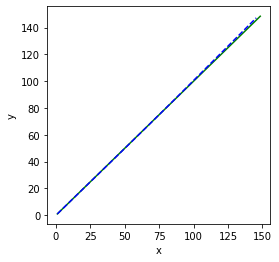

Iter 4400 | Total Loss 5.786179


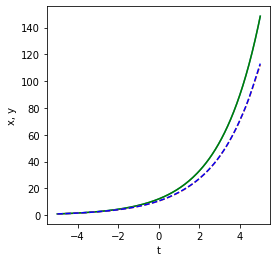

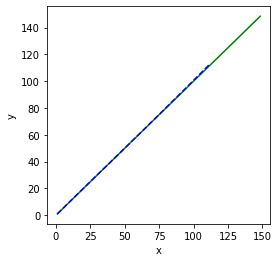

Iter 4450 | Total Loss 6.997422


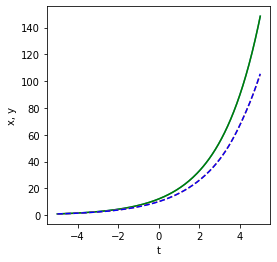

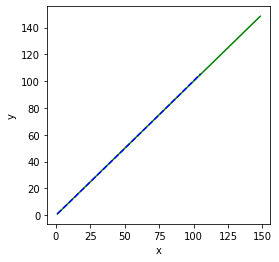

Iter 4500 | Total Loss 5.922339


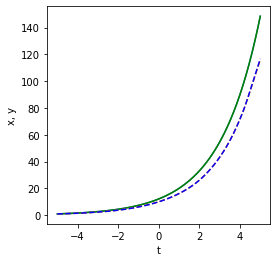

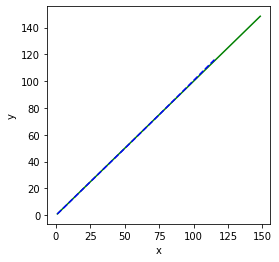

Iter 4550 | Total Loss 3.179032


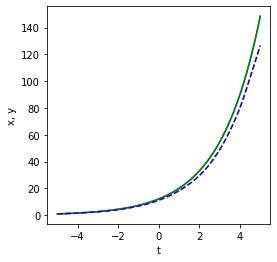

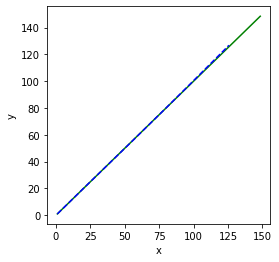

Iter 4600 | Total Loss 10.342243


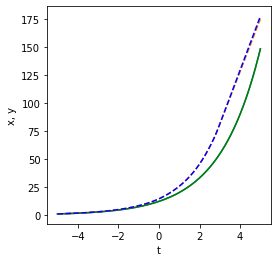

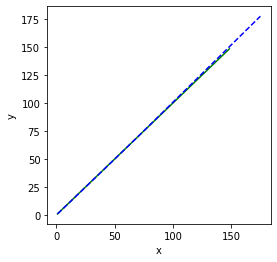

Iter 4650 | Total Loss 1.622703


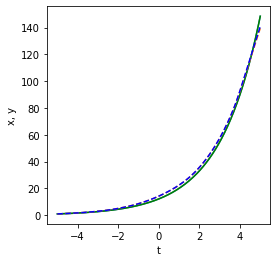

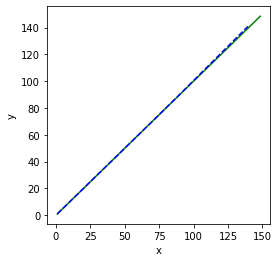

Iter 4700 | Total Loss 6.426205


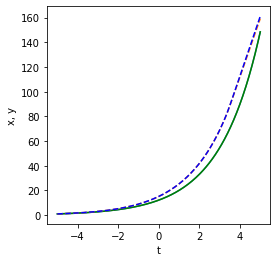

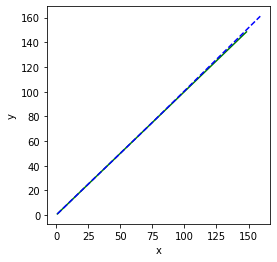

Iter 4750 | Total Loss 5.069779


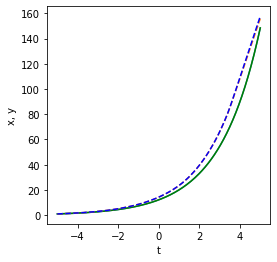

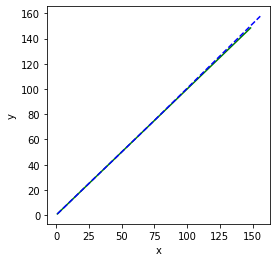

Iter 4800 | Total Loss 7.531545


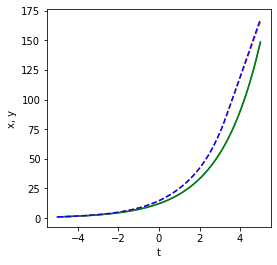

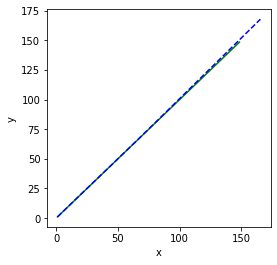

Iter 4850 | Total Loss 5.142879


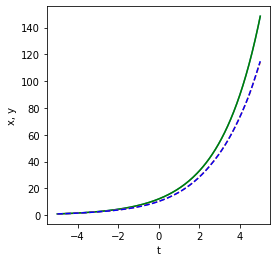

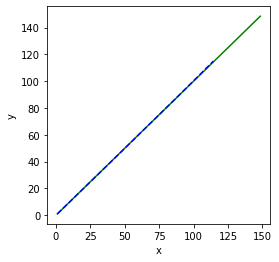

Iter 4900 | Total Loss 1.783515


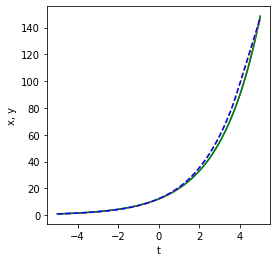

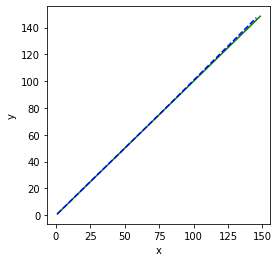

Iter 4950 | Total Loss 8.792123


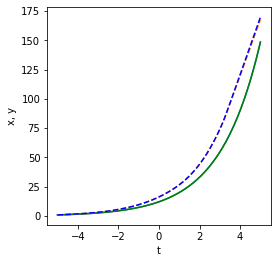

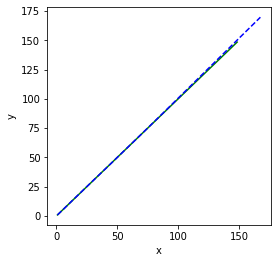

Iter 5000 | Total Loss 2.790350


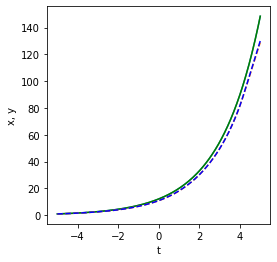

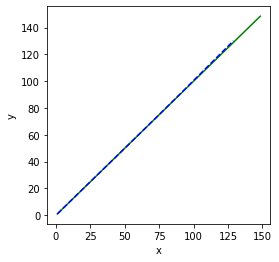

In [14]:
  ii = 0
  niters = 5000

  func = ODEFunc().to(device)
  optimizer = optim.RMSprop(func.parameters(), lr=1e-3)
  end = time.time()

  time_meter = RunningAverageMeter(0.97)
  loss_meter = RunningAverageMeter(0.97)

  for itr in range(1, niters + 1):
      optimizer.zero_grad()
      batch_y0, batch_t, batch_y = get_batch()
      pred_y = odeint(func, batch_y0, batch_t).to(device)
      loss = torch.mean(torch.abs(pred_y - batch_y))

      loss.backward()
      optimizer.step()

      time_meter.update(time.time() - end)
      loss_meter.update(loss.item())

      if itr % 50 == 0:
          with torch.no_grad():
              pred_y = odeint(func, true_y0, t)
              loss = torch.mean(torch.abs(pred_y - true_y))
              print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))
              visualize(true_y, pred_y, func, ii)
              ii += 1

      end = time.time()